In [2]:
#Import Necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

#Merge the 12 month sales data into single csv file
#df=pd.read_csv(".\Sales_Data\Sales_April_2019.csv")
#files=[file for file in os.listdir(".\Sales_Data")]

#all_months_data=pd.DataFrame()
#for file in files:
    #df=pd.read_csv("./Sales_Data/" +file)
    #all_months_data=pd.concat([all_months_data,df])

#all_months_data.to_csv("all_data.csv", index=False)


In [3]:
#Read in updated DataFrame
all_data=pd.read_csv("all_data.csv")
#all_data.drop([1])
all_data

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186844   259353      AAA Batteries (4-pack)                3       2.99   
186845   259354                      iPhone                1        700   
186846   259355                      iPhone                1        700   
186847   259356      34in Ultrawide Monitor                1     379.99   
186848   259357        USB-C Charging Cable                1      11.95   

              Order Date                         Purchase Address  
0         04/19/19 08:46             917 1st St, Dallas, TX 75001  
1       04-07-2019 22:30        682 Chestnut St, Boston, MA 02215  
2       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001  
3       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001  
4         04/30/19 09:27        333 8th St, Los Angeles, CA 90001  
...                  ...                                      ...  
186844    09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186845  09-01-2019 16:00  216 Dogwood St, San Francisco, CA 94016  
186846    09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186847    09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186848    09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186849 rows x 6 columns]

In [4]:
    # Clean up the Nan data
    # Drop rows of Nan
    nan_df = all_data[all_data.isna().any(axis=1)]
    nan_df.head()
    #which is clear all Nan values
    all_data = all_data.dropna(how='all')
    all_data.head()

Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1   176559  Bose SoundSport Headphones                1      99.99   
2   176560                Google Phone                1        600   
3   176560            Wired Headphones                1      11.99   
4   176561            Wired Headphones                1      11.99   

         Order Date                      Purchase Address  
0    04/19/19 08:46          917 1st St, Dallas, TX 75001  
1  04-07-2019 22:30     682 Chestnut St, Boston, MA 02215  
2  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001  
3  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001  
4    04/30/19 09:27     333 8th St, Los Angeles, CA 90001

In [5]:
# Find "Or" and delete it
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [6]:
#convert columns in correct type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])  # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make float

all_data.head()


Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

         Order Date                      Purchase Address  
0    04/19/19 08:46          917 1st St, Dallas, TX 75001  
1  04-07-2019 22:30     682 Chestnut St, Boston, MA 02215  
2  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001  
3  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001  
4    04/30/19 09:27     333 8th St, Los Angeles, CA 90001

# AUNGMENT DATA FROM ADDITIONAL COLUMNS

#Task2:ADDING MONTH COLUMN

In [7]:

all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'] = all_data['month'].astype('int32')

all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

              Order Date                         Purchase Address  month  
0         04/19/19 08:46             917 1st St, Dallas, TX 75001      4  
1       04-07-2019 22:30        682 Chestnut St, Boston, MA 02215      4  
2       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001      4  
3       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001      4  
4         04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4  
...                  ...                                      ...    ...  
186844    09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9  
186845  09-01-2019 16:00  216 Dogwood St, San Francisco, CA 94016      9  
186846    09/23/19 07:39     220 12th St, San Francisco, CA 94016      9  
186847    09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9  
186848    09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9  

[185950 rows x 7 columns]

In [8]:
all_data['Date'] = all_data['Order Date'].str[0:9]
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

              Order Date                         Purchase Address  month  \
0         04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
1       04-07-2019 22:30        682 Chestnut St, Boston, MA 02215      4   
2       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001      4   
3       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4         04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                  ...                                      ...    ...   
186844    09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9   
186845  09-01-2019 16:00  216 Dogwood St, San Francisco, CA 94016      9   
186846    09/23/19 07:39     220 12th St, San Francisco, CA 94016      9   
186847    09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9   
186848    09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   

             Date  
0       04/19/19   
1       04-07-201  
2       04-12-201  
3       04-12-201  
4       04/30/19   
...           ...  
186844  09/17/19   
186845  09-01-201  
186846  09/23/19   
186847  09/19/19   
186848  09/30/19   

[185950 rows x 8 columns]

#Task3: ADD a Sales column

In [9]:

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

         Order Date                      Purchase Address  month       Date  \
0    04/19/19 08:46          917 1st St, Dallas, TX 75001      4  04/19/19    
1  04-07-2019 22:30     682 Chestnut St, Boston, MA 02215      4  04-07-201   
2  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001      4  04-12-201   
3  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001      4  04-12-201   
4    04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  04/30/19    

    Sales  
0   23.90  
1   99.99  
2  600.00  
3   11.99  
4   11.99

#TASK4: ADD a city column

In [10]:
#Lets use .apply() method
def get_city(address):
    return address.split(',')[1]
#using also the function of get city #.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
#this is another format to print the data                   #f"{get_city(x)} ({get_state(x)})"
all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) +' ('+get_state(x) + ')')
#all_data['city'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
#all_data=all_data.drop(columns='city')
all_data

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186844   259353      AAA Batteries (4-pack)                 3        2.99   
186845   259354                      iPhone                 1      700.00   
186846   259355                      iPhone                 1      700.00   
186847   259356      34in Ultrawide Monitor                 1      379.99   
186848   259357        USB-C Charging Cable                 1       11.95   

              Order Date                         Purchase Address  month  \
0         04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
1       04-07-2019 22:30        682 Chestnut St, Boston, MA 02215      4   
2       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001      4   
3       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4         04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                  ...                                      ...    ...   
186844    09/17/19 20:56   840 Highland St, Los Angeles, CA 90001      9   
186845  09-01-2019 16:00  216 Dogwood St, San Francisco, CA 94016      9   
186846    09/23/19 07:39     220 12th St, San Francisco, CA 94016      9   
186847    09/19/19 17:30   511 Forest St, San Francisco, CA 94016      9   
186848    09/30/19 00:18   250 Meadow St, San Francisco, CA 94016      9   

             Date   Sales                 City  
0       04/19/19    23.90          Dallas (TX)  
1       04-07-201   99.99          Boston (MA)  
2       04-12-201  600.00     Los Angeles (CA)  
3       04-12-201   11.99     Los Angeles (CA)  
4       04/30/19    11.99     Los Angeles (CA)  
...           ...     ...                  ...  
186844  09/17/19     8.97     Los Angeles (CA)  
186845  09-01-201  700.00   San Francisco (CA)  
186846  09/23/19   700.00   San Francisco (CA)  
186847  09/19/19   379.99   San Francisco (CA)  
186848  09/30/19    11.95   San Francisco (CA)  

[185950 rows x 10 columns]

Question1:What was the best month for sales?how much was earned that month?

In [11]:
results=all_data.groupby('month').sum()
results

Quantity Ordered    Price Each         Sales
month                                              
1                 10903  1.811768e+06  1.822257e+06
2                 13449  2.188885e+06  2.202022e+06
3                 17005  2.791208e+06  2.807100e+06
4                 20558  3.367671e+06  3.390670e+06
5                 18667  3.135125e+06  3.152607e+06
6                 15253  2.562026e+06  2.577802e+06
7                 16072  2.632540e+06  2.647776e+06
8                 13448  2.230345e+06  2.244468e+06
9                 13109  2.084992e+06  2.097560e+06
10                22703  3.715555e+06  3.736727e+06
11                19798  3.180601e+06  3.199603e+06
12                28114  4.588415e+06  4.613443e+06

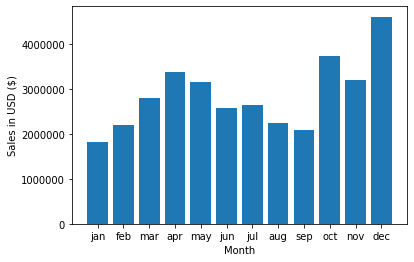

In [12]:
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
months=[x for x in months]
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()
#December month is best sale because that month comes to chritsmas new year  

In [13]:
 #The 4 month in which place to peak sale
fourth_month_sale_peak = all_data.loc[all_data['month'] == 4]
fourth_month_sale_peak

Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
1        176559  Bose SoundSport Headphones                 1       99.99   
2        176560                Google Phone                 1      600.00   
3        176560            Wired Headphones                 1       11.99   
4        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
112781   169191            27in FHD Monitor                 1      149.99   
118423   174575       AA Batteries (4-pack)                 1        3.84   
118824   174959  Bose SoundSport Headphones                 1       99.99   
119666   175769  Bose SoundSport Headphones                 1       99.99   
119857   175951                    LG Dryer                 1      600.00   

              Order Date                         Purchase Address  month  \
0         04/19/19 08:46             917 1st St, Dallas, TX 75001      4   
1       04-07-2019 22:30        682 Chestnut St, Boston, MA 02215      4   
2       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001      4   
3       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001      4   
4         04/30/19 09:27        333 8th St, Los Angeles, CA 90001      4   
...                  ...                                      ...    ...   
112781  04-01-2019 00:42     310 Cherry St, Los Angeles, CA 90001      4   
118423  04-01-2019 03:21           969 Adams St, Boston, MA 02215      4   
118824  04-01-2019 00:52  288 Lincoln St, New York City, NY 10001      4   
119666  04-01-2019 02:22     974 13th St, New York City, NY 10001      4   
119857  04-01-2019 00:04          469 Walnut St, Dallas, TX 75001      4   

             Date   Sales                 City  
0       04/19/19    23.90          Dallas (TX)  
1       04-07-201   99.99          Boston (MA)  
2       04-12-201  600.00     Los Angeles (CA)  
3       04-12-201   11.99     Los Angeles (CA)  
4       04/30/19    11.99     Los Angeles (CA)  
...           ...     ...                  ...  
112781  04-01-201  149.99     Los Angeles (CA)  
118423  04-01-201    3.84          Boston (MA)  
118824  04-01-201   99.99   New York City (NY)  
119666  04-01-201   99.99   New York City (NY)  
119857  04-01-201  600.00          Dallas (TX)  

[18279 rows x 10 columns]

In [18]:

#cities = [city for city, df in fourth_month_sale_peak.groupby('City') ]
#plt.bar(cities,results['Sales'])
#plt.xticks(cities, rotation='vertical', size=8)  
#plt.ylabel('Sales in USD ($)')
#plt.xlabel('City Name')
#plt.show()


In [24]:
# The 8 month in which place to peak sale
#eight_month_sale_peak = all_data.loc[all_data['month'] == 8]

In [19]:
#cities = [city for city, df in eight_month_sale_peak.groupby('City') ]
#plt.plot(cities,results['Sales'],'b.-')
#plt.xticks(cities, rotation='vertical', size=8)  
#plt.ylabel('Sales in USD ($)')
#plt.xlabel('City Name')
#plt.show()

In [14]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month', 'Date', 'Sales', 'City'],
      dtype='object')

Question2:WHAT CITY had the highest numbers of sales?

In [15]:
results=all_data.groupby('City').sum()
results

Quantity Ordered    Price Each   month         Sales
City                                                                     
 Atlanta (GA)                   16602  2.779908e+06  104794  2.795499e+06
 Austin (TX)                    11153  1.809874e+06   69829  1.819582e+06
 Boston (MA)                    22528  3.637410e+06  141112  3.661642e+06
 Dallas (TX)                    16730  2.752628e+06  104620  2.767975e+06
 Los Angeles (CA)               33289  5.421435e+06  208325  5.452571e+06
 New York City (NY)             27932  4.635371e+06  175741  4.664317e+06
 Portland (ME)                   2750  4.471893e+05   17144  4.497583e+05
 Portland (OR)                  11303  1.860558e+06   70621  1.870732e+06
 San Francisco (CA)             50239  8.211462e+06  315520  8.262204e+06
 Seattle (WA)                   16553  2.733296e+06  104941  2.747755e+06

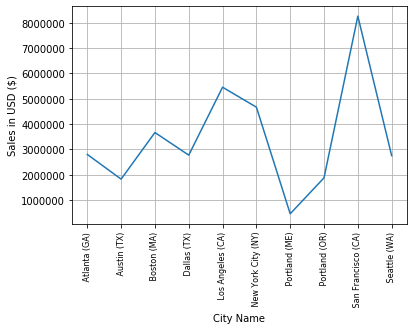

In [16]:
cities = [city for city ,df in all_data.groupby('City') ]
plt.plot(cities,results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)  
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.grid()
plt.show()
#san francisco is a best one..most of the people buy the product in online

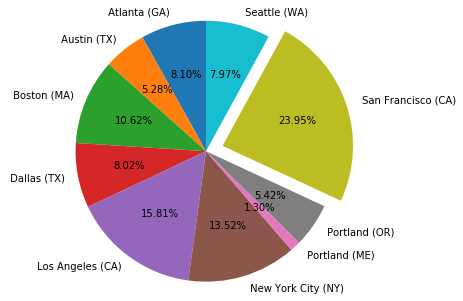

In [17]:

plt.pie(results['Sales'],labels=cities,radius=1.5,autopct='%0.2f%%',explode=[0,0,0,0,0,0,0,0,0.2,0],startangle=90)
plt.show()


Question3: What time should we display advertisements to maximize likelyhood  of cumstomer's buying product?

In [18]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [19]:
all_data['day'] = all_data['Order Date'].dt.day
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
1   176559  Bose SoundSport Headphones                 1       99.99   
2   176560                Google Phone                 1      600.00   
3   176560            Wired Headphones                 1       11.99   
4   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  month       Date  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4  04/19/19    
1 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4  04-07-201   
2 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  04-12-201   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4  04-12-201   
4 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4  04/30/19    

    Sales               City  day  Hour  Minute  
0   23.90        Dallas (TX)   19     8      46  
1   99.99        Boston (MA)    7    22      30  
2  600.00   Los Angeles (CA)   12    14      38  
3   11.99   Los Angeles (CA)   12    14      38  
4   11.99   Los Angeles (CA)   30     9      27

In [20]:
#Question:What was the best day for sales? how much was earned that day?
day_sales=all_data.groupby(all_data['day']).mean()
day_sales

Quantity Ordered  Price Each     month       Sales   day       Hour  \
day                                                                        
1            1.134854  191.587124  7.016196  192.748182   1.0  14.570649   
2            1.123447  182.394018  7.027917  183.549627   2.0  14.536227   
3            1.122873  183.615986  7.001031  184.642189   3.0  14.401787   
4            1.123145  191.027694  7.059842  191.865763   4.0  14.272008   
5            1.132226  187.513955  7.038870  188.585503   5.0  14.549336   
6            1.113338  188.307467  7.068003  189.217492   6.0  14.383377   
7            1.123653  180.621130  7.028841  181.468031   7.0  14.383226   
8            1.123662  181.093127  7.040178  182.440884   8.0  14.468467   
9            1.118090  190.356423  6.938502  191.241483   9.0  14.344619   
10           1.114578  186.052197  6.985918  187.087331  10.0  14.502960   
11           1.114041  191.455705  6.959130  192.478327  11.0  14.494232   
12           1.136222  180.946828  7.015263  182.034167  12.0  14.325620   
13           1.127815  179.031448  7.009039  180.366721  13.0  14.397399   
14           1.126938  184.024577  7.041442  185.007287  14.0  14.438897   
15           1.111874  181.490409  7.049231  182.587790  15.0  14.418220   
16           1.127698  178.702593  7.005396  179.758973  16.0  14.302322   
17           1.128703  183.318297  7.081755  184.443579  17.0  14.351627   
18           1.113895  188.081673  6.981451  189.396608  18.0  14.480312   
19           1.131579  176.495069  7.091702  177.441230  19.0  14.456571   
20           1.126057  185.230192  6.989427  186.137845  20.0  14.359629   
21           1.127094  183.125616  7.027586  184.238775  21.0  14.385714   
22           1.127169  185.155993  7.028969  186.566169  22.0  14.213421   
23           1.126633  179.052070  7.118697  180.135467  23.0  14.343032   
24           1.124065  181.612236  7.003415  182.476028  24.0  14.392195   
25           1.122032  191.623954  7.084598  192.747129  25.0  14.411280   
26           1.139656  184.080916  7.019812  185.197027  26.0  14.491718   
27           1.116724  183.297332  7.014877  184.460224  27.0  14.387935   
28           1.124857  182.450962  7.020809  183.570318  28.0  14.484024   
29           1.122902  188.120203  7.416783  189.510273  29.0  14.457692   
30           1.121960  183.481106  7.403337  184.589462  30.0  14.518551   
31           1.130239  183.026025  7.500141  184.290889  31.0  14.215471   

        Minute  
day             
1    29.648653  
2    29.384218  
3    29.721774  
4    29.663534  
5    29.597010  
6    29.290736  
7    29.513178  
8    29.616664  
9    29.243376  
10   29.624900  
11   29.456987  
12   29.477761  
13   29.342690  
14   29.316691  
15   29.528296  
16   29.656475  
17   29.536345  
18   29.258705  
19   29.535680  
20   29.426480  
21   29.194417  
22   29.770213  
23   29.757150  
24   29.935610  
25   29.265501  
26   29.000325  
27   29.123263  
28   29.716533  
29   29.283741  
30   29.917096  
31   28.930802

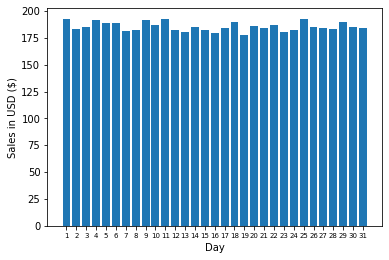

In [22]:
day=range(1,32)
plt.bar(day,day_sales['Sales'])
plt.xticks(day,size=7)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Day')
plt.show()

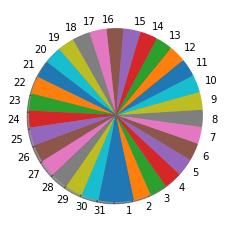

In [27]:
plt.pie(day_sales['Sales'],labels=day,startangle=270,shadow=True)
plt.show()

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186848
Data columns (total 13 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null datetime64[ns]
Purchase Address    185950 non-null object
month               185950 non-null int32
Date                185950 non-null object
Sales               185950 non-null float64
City                185950 non-null object
day                 185950 non-null int64
Hour                185950 non-null int64
Minute              185950 non-null int64
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(5)
memory usage: 19.2+ MB


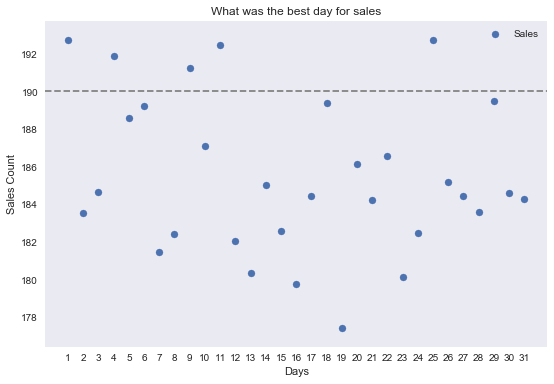

In [81]:
#What was the best day for sales? how much was earned that day?
%matplotlib inline

plt.figure(figsize=(9,6))
plt.axhline(190,c=(.5, .5, .5),ls='--')

plt.scatter(day,day_sales['Sales'],label='Sales');
plt.grid()
plt.xticks(day[:])

plt.title('What was the best day for sales')
plt.xlabel('Days')
plt.ylabel('Sales Count')
plt.legend()
plt.show()
#Above the line the when it sales highest

In [ ]:
#import seaborn as sns
#Create diff with the mean values between City and price each
#az=all_data[['Price Each','month']].groupby('month').agg({'Price Each':'mean'})
#print(az)
#Barplot in between Price Each and month
#sns.barplot(x = 'month',y = 'Price Each', data = all_data)

In [31]:
#Create diff with the sum values between city and price each

#ay=all_data[['Price Each','City']].groupby('City').agg({'Price Each':'mean'})
#print(ay)
#sns.set(rc={'figure.figsize':{10,14}})
#ax=sns.barplot(x = 'City',y = 'Price Each', data = all_data, hue = 'month',ci=False)#ci which is false or None

In [28]:
hours = [hour for hour, df in all_data.groupby('Hour') ]
x=all_data.groupby(['Hour']).count()
print(x)

      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3910     3910              3910        3910        3910   
1         2350     2350              2350        2350        2350   
2         1243     1243              1243        1243        1243   
3          831      831               831         831         831   
4          854      854               854         854         854   
5         1321     1321              1321        1321        1321   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587           

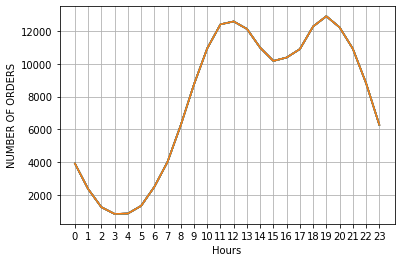

In [29]:
plt.plot(hours, x)
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('NUMBER OF ORDERS')
plt.grid()
plt.show()


#MY RECOMMenDATION is around 11Am(11) and 7Pm(19)

In [34]:
import re
#peak_month = all_data.loc(all_data['city'] == 'Los Angeles', axis=1)
#peak_month = all_data.loc[all_data['City'].str.contains('San Francisco',flags=re.I,regex=True)]
#peak_month

In [39]:
#hours = [hour for hour, df in peak_month.groupby('Hour') ]
#plt.plot(hours, all_data.groupby(['Hour']).count())
#plt.xticks(hours)
#plt.xlabel('Hours')
#plt.ylabel('NUMBER OF ORDERS')
#plt.grid()
#plt.show()


#MY RECOMMenDATION is around 11Am(11) and 7Pm(19)

In [30]:
df = all_data[['Order ID','Product']]
df

Order ID                     Product
0        176558        USB-C Charging Cable
1        176559  Bose SoundSport Headphones
2        176560                Google Phone
3        176560            Wired Headphones
4        176561            Wired Headphones
...         ...                         ...
186844   259353      AAA Batteries (4-pack)
186845   259354                      iPhone
186846   259355                      iPhone
186847   259356      34in Ultrawide Monitor
186848   259357        USB-C Charging Cable

[185950 rows x 2 columns]

In [206]:
for i in all_data.columns:
    print(i)

Order ID
Product
Quantity Ordered
Price Each
Order Date
Purchase Address
month
Sales
City
day
Hour
Minute


Question 4:What products are most often sold together?

In [31]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\ELCOT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Order ID                                            Grouped
2     176560                      Google Phone,Wired Headphones
17    176574                  Google Phone,USB-C Charging Cable
29    176585  Bose SoundSport Headphones,Bose SoundSport Hea...
31    176586                AAA Batteries (4-pack),Google Phone
118   176672      Lightning Charging Cable,USB-C Charging Cable

In [57]:
#import seaborn as sns
#suggesion=pass

In [32]:
#Refferenced : https://stackoverflow.com/questions/52195887/counting-uniques-pairs-of-numbers-into-a-python-dictonary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
    #print(count)
    
for key,value in count.most_common(10):
    print(key,value)

Counter({('Google Phone', 'Wired Headphones'): 1})
Counter({('Google Phone', 'Wired Headphones'): 1, ('Google Phone', 'USB-C Charging Cable'): 1})
Counter({('Google Phone', 'Wired Headphones'): 1, ('Google Phone', 'USB-C Charging Cable'): 1, ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 1})
Counter({('Google Phone', 'Wired Headphones'): 1, ('Google Phone', 'USB-C Charging Cable'): 1, ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 1, ('AAA Batteries (4-pack)', 'Google Phone'): 1})
Counter({('Google Phone', 'Wired Headphones'): 1, ('Google Phone', 'USB-C Charging Cable'): 1, ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 1, ('AAA Batteries (4-pack)', 'Google Phone'): 1, ('Lightning Charging Cable', 'USB-C Charging Cable'): 1})
Counter({('Google Phone', 'Wired Headphones'): 1, ('Google Phone', 'USB-C Charging Cable'): 1, ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 1, ('AAA Batteries (4-pack)', 'Google Phone'): 1, ('Lightning 

Counter({('iPhone', 'Lightning Charging Cable'): 57, ('Google Phone', 'USB-C Charging Cable'): 52, ('Google Phone', 'Wired Headphones'): 20, ('iPhone', 'Apple Airpods Headphones'): 19, ('iPhone', 'Wired Headphones'): 17, ('Vareebadd Phone', 'USB-C Charging Cable'): 16, ('Google Phone', 'Bose SoundSport Headphones'): 10, ('Vareebadd Phone', 'Wired Headphones'): 8, ('AA Batteries (4-pack)', 'Apple Airpods Headphones'): 6, ('USB-C Charging Cable', 'Wired Headphones'): 5, ('Lightning Charging Cable', 'Lightning Charging Cable'): 5, ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 4, ('Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 4, ('USB-C Charging Cable', 'AA Batteries (4-pack)'): 4, ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 4, ('AAA Batteries (4-pack)', 'Google Phone'): 3, ('Lightning Charging Cable', 'USB-C Charging Cable'): 3, ('AAA Batteries (4-pack)', '27in FHD Monitor'): 3, ('iPhone', 'AAA Batteries (4-pack)'): 3, ('USB-C Charging Cable', 'Lightning Ch

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Counter({('Google Phone', 'USB-C Charging Cable'): 358, ('iPhone', 'Lightning Charging Cable'): 331, ('iPhone', 'Wired Headphones'): 162, ('Google Phone', 'Wired Headphones'): 148, ('iPhone', 'Apple Airpods Headphones'): 137, ('Vareebadd Phone', 'USB-C Charging Cable'): 131, ('Google Phone', 'Bose SoundSport Headphones'): 78, ('USB-C Charging Cable', 'Wired Headphones'): 56, ('Vareebadd Phone', 'Wired Headphones'): 56, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 31, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 27, ('Apple Airpods Headphones', 'Wired Headphones'): 26, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 24, ('Lightning Charging Cable', 'Wired Headphones'): 24, ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 23, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 23, ('Lightning Charging Cable', 'USB-C Charging Cable'): 22, ('Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 22, ('Bose SoundSport Headphones', 'Wired Headphones'): 20,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Counter({('Google Phone', 'USB-C Charging Cable'): 585, ('iPhone', 'Lightning Charging Cable'): 577, ('iPhone', 'Wired Headphones'): 264, ('Google Phone', 'Wired Headphones'): 243, ('Vareebadd Phone', 'USB-C Charging Cable'): 216, ('iPhone', 'Apple Airpods Headphones'): 213, ('Google Phone', 'Bose SoundSport Headphones'): 123, ('USB-C Charging Cable', 'Wired Headphones'): 100, ('Vareebadd Phone', 'Wired Headphones'): 90, ('Lightning Charging Cable', 'Wired Headphones'): 47, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 46, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 44, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 44, ('Apple Airpods Headphones', 'Wired Headphones'): 42, ('Lightning Charging Cable', 'USB-C Charging Cable'): 34, ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 33, ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 33, ('Apple Airpods Headphones', 'AAA Batteries (4-pack)'): 32, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 31

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Counter({('iPhone', 'Lightning Charging Cable'): 824, ('Google Phone', 'USB-C Charging Cable'): 797, ('iPhone', 'Wired Headphones'): 355, ('Google Phone', 'Wired Headphones'): 330, ('iPhone', 'Apple Airpods Headphones'): 289, ('Vareebadd Phone', 'USB-C Charging Cable'): 289, ('Google Phone', 'Bose SoundSport Headphones'): 171, ('USB-C Charging Cable', 'Wired Headphones'): 133, ('Vareebadd Phone', 'Wired Headphones'): 116, ('Lightning Charging Cable', 'Wired Headphones'): 67, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 65, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 65, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 61, ('Apple Airpods Headphones', 'Wired Headphones'): 52, ('Lightning Charging Cable', 'USB-C Charging Cable'): 47, ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 45, ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 44, ('Bose SoundSport Headphones', 'Wired Headphones'): 43, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 43, 

Counter({('iPhone', 'Lightning Charging Cable'): 838, ('Google Phone', 'USB-C Charging Cable'): 814, ('iPhone', 'Wired Headphones'): 361, ('Google Phone', 'Wired Headphones'): 340, ('Vareebadd Phone', 'USB-C Charging Cable'): 296, ('iPhone', 'Apple Airpods Headphones'): 294, ('Google Phone', 'Bose SoundSport Headphones'): 173, ('USB-C Charging Cable', 'Wired Headphones'): 136, ('Vareebadd Phone', 'Wired Headphones'): 120, ('Lightning Charging Cable', 'Wired Headphones'): 69, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 66, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 66, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 64, ('Apple Airpods Headphones', 'Wired Headphones'): 52, ('Lightning Charging Cable', 'USB-C Charging Cable'): 48, ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 45, ('Bose SoundSport Headphones', 'Wired Headphones'): 44, ('AA Batteries (4-pack)', 'Lightning Charging Cable'): 44, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 43, (

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Question 5:What product sold the most? why do you think it sold the most?

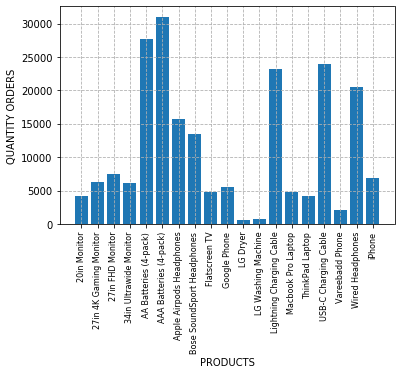

In [33]:
product_group = all_data.groupby('Product') 
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)

plt.ylabel("QUANTITY ORDERS")
plt.xlabel("PRODUCTS")

plt.xticks(products, rotation='vertical', size=8)
plt.grid(ls='--')
plt.show()




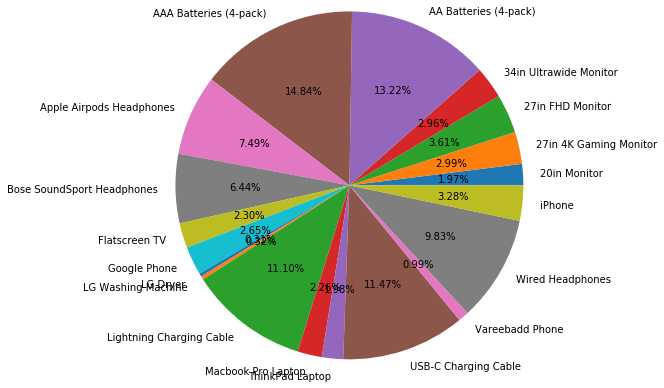

In [56]:
plt.pie(quantity_ordered,labels=products,autopct='%0.2f%%',radius=2)
plt.show()

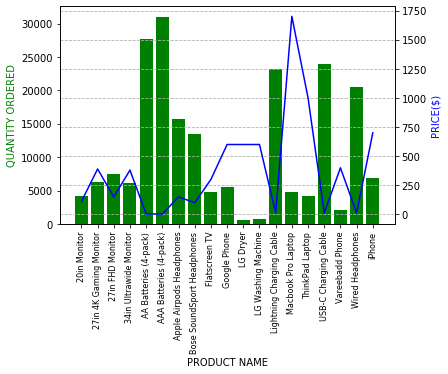

In [34]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('PRODUCT NAME')
ax1.set_ylabel('QUANTITY ORDERED', color='g')
ax2.set_ylabel('PRICE($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)
    
plt.grid(ls='--')
plt.show()

                     Quantity Ordered  Price Each      Sales
City                                                        
 Atlanta (GA)                     876   148523.69  149159.54
 Austin (TX)                      582    87663.19   88087.06
 Boston (MA)                     1174   200239.58  201088.49
 Dallas (TX)                      878   142873.48  143462.51
 Los Angeles (CA)                1716   286754.48  288601.90
 New York City (NY)              1513   257892.39  260591.29
 Portland (ME)                    138    22628.93   22708.80
 Portland (OR)                    555    91834.57   92276.76
 San Francisco (CA)              2661   433667.52  435588.33
 Seattle (WA)                     810   139690.55  140692.05


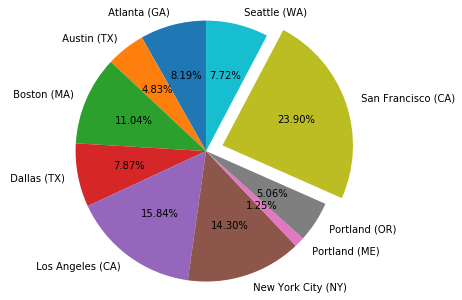

In [35]:
#in first month in which city is highest sold
df1=all_data[all_data['month'] == 1]
df1
result1=df1.groupby('City')['Quantity Ordered','Price Each','Sales'].sum()
print(result1)
plt.pie(result1['Sales'],labels=cities,radius=1.5,autopct='%0.2f%%',explode=[0,0,0,0,0,0,0,0,0.2,0],startangle=90)
plt.show()

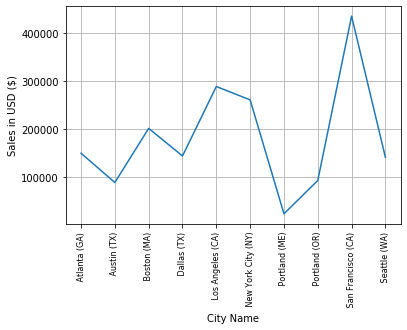

In [82]:
#cities = [city for city ,df in all_data.groupby('City') ]
plt.plot(cities,result['Sales'])
plt.xticks(cities, rotation='vertical', size=8)  
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.grid()
plt.show()

#Difference between 1st month highest sold cities and 10th month highest sold cities

In [36]:
df10=all_data[all_data['month'] == 10]
df10
result=df10.groupby('City')[['Quantity Ordered','Price Each','Sales']].sum()


In [37]:
display(result)
display(result1)

Quantity Ordered  Price Each      Sales
City                                                        
 Atlanta (GA)                    1793   304508.46  306293.01
 Austin (TX)                     1235   202100.25  203196.12
 Boston (MA)                     2444   364265.09  367036.39
 Dallas (TX)                     1813   321353.23  323135.60
 Los Angeles (CA)                3725   609228.15  612453.25
 New York City (NY)              2951   485336.03  486954.41
 Portland (ME)                    281    51801.25   52322.52
 Portland (OR)                   1274   200223.39  201778.34
 San Francisco (CA)              5310   861937.47  866700.98
 Seattle (WA)                    1877   314801.51  316856.26

Quantity Ordered  Price Each      Sales
City                                                        
 Atlanta (GA)                     876   148523.69  149159.54
 Austin (TX)                      582    87663.19   88087.06
 Boston (MA)                     1174   200239.58  201088.49
 Dallas (TX)                      878   142873.48  143462.51
 Los Angeles (CA)                1716   286754.48  288601.90
 New York City (NY)              1513   257892.39  260591.29
 Portland (ME)                    138    22628.93   22708.80
 Portland (OR)                    555    91834.57   92276.76
 San Francisco (CA)              2661   433667.52  435588.33
 Seattle (WA)                     810   139690.55  140692.05

In [38]:
#San_francisco=all_data(all_data['City'] == 'Atlanta (GA)')
#all_data[all_data['Order Date'] == '04/30/19 08:46']
df=pd.read_csv("all_data.csv")
#df=df.rename(columns={'Order Date':'Order_Date'})
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186844   259353      AAA Batteries (4-pack)                3       2.99   
186845   259354                      iPhone                1        700   
186846   259355                      iPhone                1        700   
186847   259356      34in Ultrawide Monitor                1     379.99   
186848   259357        USB-C Charging Cable                1      11.95   

              Order Date                         Purchase Address  
0         04/19/19 08:46             917 1st St, Dallas, TX 75001  
1       04-07-2019 22:30        682 Chestnut St, Boston, MA 02215  
2       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001  
3       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001  
4         04/30/19 09:27        333 8th St, Los Angeles, CA 90001  
...                  ...                                      ...  
186844    09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  
186845  09-01-2019 16:00  216 Dogwood St, San Francisco, CA 94016  
186846    09/23/19 07:39     220 12th St, San Francisco, CA 94016  
186847    09/19/19 17:30   511 Forest St, San Francisco, CA 94016  
186848    09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  

[186849 rows x 6 columns]

In [39]:
#in here the index is DATETIMEINDEX 
#why did we change the index to be datetimeindex well there are obvious benefits
#df.index
df['Date'] = df['Order Date'].str[0:9]
df

Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
1        176559  Bose SoundSport Headphones                1      99.99   
2        176560                Google Phone                1        600   
3        176560            Wired Headphones                1      11.99   
4        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186844   259353      AAA Batteries (4-pack)                3       2.99   
186845   259354                      iPhone                1        700   
186846   259355                      iPhone                1        700   
186847   259356      34in Ultrawide Monitor                1     379.99   
186848   259357        USB-C Charging Cable                1      11.95   

              Order Date                         Purchase Address       Date  
0         04/19/19 08:46             917 1st St, Dallas, TX 75001  04/19/19   
1       04-07-2019 22:30        682 Chestnut St, Boston, MA 02215  04-07-201  
2       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001  04-12-201  
3       04-12-2019 14:38     669 Spruce St, Los Angeles, CA 90001  04-12-201  
4         04/30/19 09:27        333 8th St, Los Angeles, CA 90001  04/30/19   
...                  ...                                      ...        ...  
186844    09/17/19 20:56   840 Highland St, Los Angeles, CA 90001  09/17/19   
186845  09-01-2019 16:00  216 Dogwood St, San Francisco, CA 94016  09-01-201  
186846    09/23/19 07:39     220 12th St, San Francisco, CA 94016  09/23/19   
186847    09/19/19 17:30   511 Forest St, San Francisco, CA 94016  09/19/19   
186848    09/30/19 00:18   250 Meadow St, San Francisco, CA 94016  09/30/19   

[186849 rows x 7 columns]

In [40]:
#pd.to_datetime(Date)
#df.set_index('Date')
df.to_csv('sales_df.csv')

In [248]:
df1=pd.read_csv('sales_df.csv',parse_dates=['Date'])

df1.head()

Unnamed: 0 Order ID                     Product Quantity Ordered  \
0           0   176558        USB-C Charging Cable                2   
1           1   176559  Bose SoundSport Headphones                1   
2           2   176560                Google Phone                1   
3           3   176560            Wired Headphones                1   
4           4   176561            Wired Headphones                1   

  Price Each        Order Date                      Purchase Address  \
0      11.95    04/19/19 08:46          917 1st St, Dallas, TX 75001   
1      99.99  04-07-2019 22:30     682 Chestnut St, Boston, MA 02215   
2        600  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001   
3      11.99  04-12-2019 14:38  669 Spruce St, Los Angeles, CA 90001   
4      11.99    04/30/19 09:27     333 8th St, Los Angeles, CA 90001   

        Date  
0  04/19/19   
1  04-07-201  
2  04-12-201  
3  04-12-201  
4  04/30/19

In [259]:
import datetime
df1['Date'] = pd.to_datetime(df1['Date'])
df1
#datetime.datetime.strptime('Date', '%m/%d/%y').strftime('%d/%m/%y')

AttributeError: module 'pandas' has no attribute 'to_date'

In [214]:
#pd.to_datetime(df['Order_Date'])

In [61]:
#ax = sns.lineplot(x = 'month', y = 'Sales', data = all_data)

In [5]:
#Add Categries
#ax = sns.lineplot(x = 'month', y = 'Sales', data = all_data, hue = 'City')

In [4]:
#Increase the Resolution size
#sns.set(rc={'figure.figsize':(12,10)})
#ax = sns.lineplot(x = 'month', y = 'Sales', data = all_data, hue = 'City')

In [3]:
#may be the output clearly visualizing
#ax = sns.lineplot(x = 'month', y = 'Sales', data = all_data, hue = 'City', ci=False)

In [2]:
#ax = sns.lineplot(x = 'month', y = 'Sales', data = all_data, hue = 'City', ci=False, markers=True)

In [1]:
#ax=sns.barplot(x = 'month',y = 'Price Each', data = all_data)